<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter3/ratioest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!python --version

Python 3.7.11


# Example 3.5
## Import modules

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numba import jit
from collections import Counter
print(np.__version__)

1.19.5


## Set random seed

In [12]:
np.random.seed(123)

## Original Program

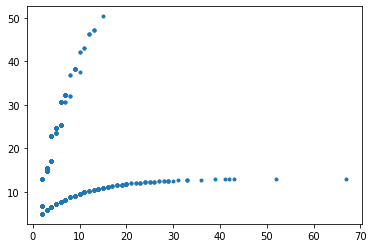

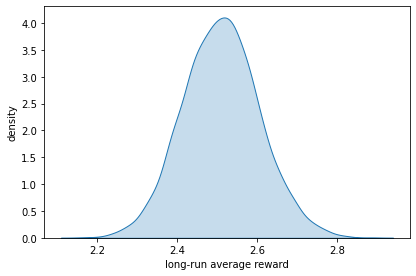

In [13]:
n = 1000
P = np.array([[0, 0.2, 0.5, 0.3],
              [0.5 ,0, 0.5, 0],
              [0.3, 0.7, 0, 0],
              [0.1, 0, 0, 0.9]])
r = np.array([4,3,10,1])  ## reward
Corg = np.array(np.zeros((n,1)))
Rorg = np.array(np.zeros((n,1)))
rho=0.9

## Add by WT
datapoint = []
## End of Add

#@jit()
def generate_cyclereward(n):
   for i in range(n):
       t=1
       xreg = 1   #regenerative state  (out of 1,2,3,4)
       reward = r[0]
       x= np.amin(np.argwhere(np.cumsum(P[xreg-1,:]) > np.random.rand())) + 1
       while x != xreg:
           t += 1
           reward += rho**(t-1)*r[x-1]
           x = np.amin(np.where(np.cumsum(P[x-1,:]) > np.random.rand())) + 1
       Corg[i] = t
       Rorg[i] = reward
       ## Add by WT
       datapoint.append((t,reward))
       ## End of Add

   return Corg, Rorg

#n=1000
Corg, Rorg = generate_cyclereward(n)

plt.plot(Corg,Rorg,'.')
plt.show()

Aorg = np.mean(Rorg)/np.mean(Corg)
K = 5000
A = np.array(np.zeros((K,1)))
C = np.array(np.zeros((n,1)))
R = np.array(np.zeros((n,1)))
for i in range(K):
    ind = np.ceil(n*np.random.rand(1,n)).astype(int)[0]-1
    C = Corg[ind]
    R = Rorg[ind]
    A[i] = np.mean(R)/np.mean(C)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.tight_layout()
plt.xlabel('long-run average reward')
plt.ylabel('density')
plt.tight_layout()
plt.savefig('MSErepeatpy.pdf',format='pdf')
sns.kdeplot(A.flatten(),shade=True)   
plt.savefig('CRresamplingpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Reproduce Figure 3.8

Counter({(3, 15.43): 186, (2, 13.0): 151, (2, 6.7): 102, (5, 24.688299999999998): 52, (4, 22.72): 52, (4, 16.987000000000002): 38, (4, 6.439000000000001): 34, (3, 5.710000000000001): 33, (3, 14.8): 30, (5, 7.095100000000001): 29, (2, 4.9): 27, (6, 25.319470000000003): 18, (11, 9.861894039100003): 18, (7, 8.217031000000002): 17, (7, 32.187523): 15, (6, 7.685590000000001): 15, (14, 10.712320754503905): 14, (9, 9.125795110000002): 14, (10, 9.513215599000002): 12, (6, 30.5932): 11, (20, 11.784233454094315): 9, (15, 10.941088679053514): 9, (8, 8.695327900000002): 9, (16, 11.146979811148164): 8, (9, 38.26189363): 8, (13, 10.458134171671004): 7, (5, 23.548000000000002): 6, (12, 10.175704635190003): 6, (19, 11.649148282327015): 6, (18, 11.499053647030015): 5, (29, 12.528987130275382): 4, (17, 11.332281830033349): 4, (24, 12.202335569231282): 4, (26, 12.35389181107734): 3, (13, 47.167528410643): 3, (12, 46.3202398012): 3, (23, 12.113706188034758): 3, (33, 12.690968456173682): 3, (25, 12.2821020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  app.launch_new_instance()


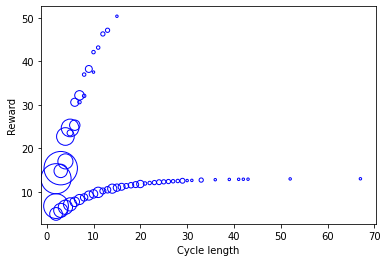

In [14]:
c = Counter(datapoint)
mostcommon = c.most_common(500)

xx = []
yy = []
zz = []
radius = 6  # Set the size of circle
for i in range(59) :
  xx.append(mostcommon[i][0][0])
  yy.append(mostcommon[i][0][1])
  zz.append(mostcommon[i][1]*radius)

print(c)
print(mostcommon[1][1])
#s = [10*4**n for n in range(len(x))]
plt.scatter(xx,yy,s=zz,c='', edgecolors='b')
plt.xlabel('Cycle length')
plt.ylabel('Reward')
plt.show()

## Check the histogram of Figure 3.9

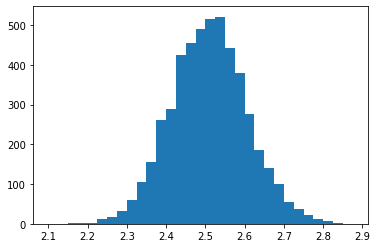

In [15]:
plt.hist(A, bins = np.arange(2.1,2.9,0.025))   
plt.show()